In [110]:
import numpy as np
from scipy.fftpack import fft, rfft, fftshift
from scipy.signal.windows import hann
import matplotlib.pyplot as plt
from cca.data_util import load_neuro_data
from cca.synth_data import gen_gp_kernel, sample_gp, calc_pi_for_gp

In [125]:
"""
tau = 10
T = 1000
num_to_concat = 25
n = T*num_to_concat
sigma = 0.05
K_1 = gen_gp_kernel("exp", temporal_scale=tau, spatial_scale=1, local_noise=sigma*2)
K_2 = gen_gp_kernel("squared_exp", temporal_scale=tau*3, spatial_scale=1, local_noise=sigma)
def K(a,b,c,d):
    return K_1(a,b,c,d) + K_2(a,b,c,d)
x = sample_gp(T, 1, K, num_to_concat).reshape((n,))
x += np.random.normal(0, sigma, x.shape)
#x = np.random.normal(0, 1, (n,))
"""

X, Y = load_neuro_data("/home/davidclark/Projects/ComplexityComponentsAnalysis/neuro_data/example_data_m1.pickle", bin_width_s=0.1)
X = np.sqrt(X)
X = (X - X.mean(axis=0))/X.std(axis=0)
x = X.mean(axis=1)
n = len(x)
print(n)

x = x[:12000]
n = len(x)


#plt.plot(x)

12449


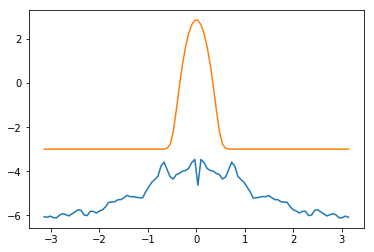

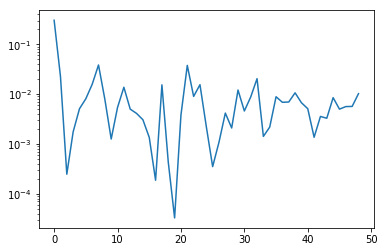

0.33513896320000236
0.8699654640827106


In [129]:
window = 100
x_reshape = np.reshape(x, (n // window, window))
x_reshape = (x_reshape.T - x_reshape.mean(axis=1).T).T
x_reshape = x_reshape * hann(window)
F_x = fft(x_reshape, axis=1)
S = np.abs(F_x)**2
S_avg = fftshift(np.mean(S, axis=0))
f = S_avg / window

lambda_param = np.linspace(-np.pi, np.pi, len(f))
plt.plot(lambda_param, np.log(f))

pred = np.log(sigma + np.sqrt(np.pi)*tau*np.exp(-0.25*(lambda_param**2)*(tau**2)))
plt.plot(lambda_param, pred)
plt.show()

b_k = np.abs(fft( np.log(f) )) / window
b_k = b_k[: window // 2]

plt.yscale("log")
plt.plot(b_k[1:]**2 * np.arange(1,len(b_k)))
plt.show()

pi = 0.5*np.sum( b_k**2 * np.arange(len(b_k)) )
print(pi)
print(calc_pi_for_gp(window, 1, K))

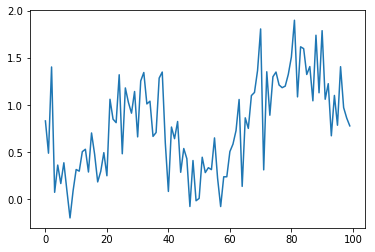

In [81]:
plt.plot(x[:100])

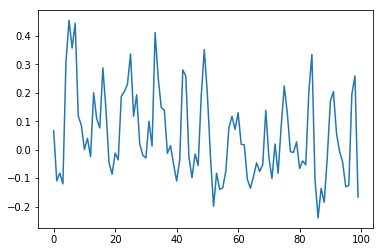

In [121]:
X, Y = load_neuro_data("/home/davidclark/Projects/ComplexityComponentsAnalysis/neuro_data/example_data_m1.pickle", bin_width_s=0.1)
X = np.sqrt(X)
X = (X - X.mean(axis=0))/X.std(axis=0)
avg = X.mean(axis=1)
plt.plot(avg[:100])
